In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
from torch import nn
import torch.nn.functional as F
from torchvision.models import resnet18, resnet50, ResNet18_Weights, ResNet50_Weights

import utils
from importlib import reload
reload(utils)
utils.set_namespace('04-resnet')

In [2]:
train_dl, valid_dl, test_dl, classes = utils.make_tiny_imagenet_dataloaders()
len(train_dl.dataset), len(valid_dl.dataset), len(test_dl.dataset), len(classes)

(90000, 10000, 10000, 200)

In [3]:
class ResNet18Transfer(nn.Module):
    def __init__(self):
        super().__init__()
        self.pretrained = resnet18(weights=ResNet18_Weights.DEFAULT).to(utils.device)
        self.pretrained.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(512, 200)
        )

    def forward(self, x):
        x = self.pretrained(x)
        return x

In [4]:
# utils.delete_model('resnet-18-transfer-02')
model1 = utils.register_model(
    'resnet-18-transfer-02', 
    ResNet18Transfer(), 
    'Fresh transfer learning from ResNet18 by overriding the last fc layer, batch size 64')
model1.setup(optimizer_cls=torch.optim.Adam, optimizer_args=dict(lr=1e-5), loss_fn_cls=torch.nn.CrossEntropyLoss)

Loaded model resnet-18-transfer-02 from checkpoint. epoch=14, step=19698. train_loss=1.4097, train_accuracy=0.6539, val_loss=1.9941, val_accuracy=0.5214
resnet-18-transfer-02 registered.
Trainable params: 11.3 M. Untrainable params: 0.00. Buffers: 12.0 k.
Skipped compilation


{'model_name': 'resnet-18-transfer-02',
 'description': 'Fresh transfer learning from ResNet18 by overriding the last fc layer, batch size 64',
 'persisted': True,
 'compiled': True,
 'optimizer_cls': <class 'torch.optim.adam.Adam'>,
 'optimizer_args': {'lr': 1e-05},
 'loss_fn_cls': <class 'torch.nn.modules.loss.CrossEntropyLoss'>,
 'loss_fn_args': {},
 'scheduler_cls': <class 'NoneType'>,
 'scheduler_args': None,
 'epoch': 14,
 'step': 19698,
 'metrics': {'train_loss': 1.4097231893751356,
             'train_accuracy': 0.6539,
             'val_loss': 1.9940666374206544,
             'val_accuracy': 0.5214}}

Initial val_loss: 5.9215


100%|██████████| 157/157 [00:01<00:00, 91.02it/s] 


Epoch 1/1000: train_loss=5.3889, train_accuracy=0.0295, val_loss=4.4145, val_accuracy=0.1478
Saved checkpoint for resnet-18-transfer-02. epoch=1, step=1407. train_loss=5.3889, train_accuracy=0.0295, val_loss=4.4145, val_accuracy=0.1478


100%|██████████| 157/157 [00:01<00:00, 93.96it/s] 


Epoch 2/1000: train_loss=4.2590, train_accuracy=0.1359, val_loss=3.4682, val_accuracy=0.2830
Saved checkpoint for resnet-18-transfer-02. epoch=2, step=2814. train_loss=4.2590, train_accuracy=0.1359, val_loss=3.4682, val_accuracy=0.2830


100%|██████████| 157/157 [00:01<00:00, 88.81it/s]


Epoch 3/1000: train_loss=3.5215, train_accuracy=0.2446, val_loss=2.9550, val_accuracy=0.3626
Saved checkpoint for resnet-18-transfer-02. epoch=3, step=4221. train_loss=3.5215, train_accuracy=0.2446, val_loss=2.9550, val_accuracy=0.3626


100%|██████████| 157/157 [00:01<00:00, 91.79it/s] 


Epoch 4/1000: train_loss=3.0543, train_accuracy=0.3219, val_loss=2.6366, val_accuracy=0.4076
Saved checkpoint for resnet-18-transfer-02. epoch=4, step=5628. train_loss=3.0543, train_accuracy=0.3219, val_loss=2.6366, val_accuracy=0.4076


100%|██████████| 157/157 [00:01<00:00, 92.23it/s] 


Epoch 5/1000: train_loss=2.7321, train_accuracy=0.3784, val_loss=2.4481, val_accuracy=0.4367
Saved checkpoint for resnet-18-transfer-02. epoch=5, step=7035. train_loss=2.7321, train_accuracy=0.3784, val_loss=2.4481, val_accuracy=0.4367


100%|██████████| 157/157 [00:01<00:00, 89.81it/s] 


Epoch 6/1000: train_loss=2.4881, train_accuracy=0.4241, val_loss=2.3104, val_accuracy=0.4619
Saved checkpoint for resnet-18-transfer-02. epoch=6, step=8442. train_loss=2.4881, train_accuracy=0.4241, val_loss=2.3104, val_accuracy=0.4619


100%|██████████| 157/157 [00:01<00:00, 88.20it/s] 


Epoch 7/1000: train_loss=2.2917, train_accuracy=0.4645, val_loss=2.2187, val_accuracy=0.4804
Saved checkpoint for resnet-18-transfer-02. epoch=7, step=9849. train_loss=2.2917, train_accuracy=0.4645, val_loss=2.2187, val_accuracy=0.4804


100%|██████████| 157/157 [00:01<00:00, 87.36it/s] 


Epoch 8/1000: train_loss=2.1263, train_accuracy=0.4993, val_loss=2.1484, val_accuracy=0.4880
Saved checkpoint for resnet-18-transfer-02. epoch=8, step=11256. train_loss=2.1263, train_accuracy=0.4993, val_loss=2.1484, val_accuracy=0.4880


100%|██████████| 157/157 [00:01<00:00, 90.00it/s] 


Epoch 9/1000: train_loss=1.9798, train_accuracy=0.5288, val_loss=2.1039, val_accuracy=0.4973
Saved checkpoint for resnet-18-transfer-02. epoch=9, step=12663. train_loss=1.9798, train_accuracy=0.5288, val_loss=2.1039, val_accuracy=0.4973


100%|██████████| 157/157 [00:01<00:00, 90.29it/s] 


Epoch 10/1000: train_loss=1.8534, train_accuracy=0.5544, val_loss=2.0638, val_accuracy=0.5050
Saved checkpoint for resnet-18-transfer-02. epoch=10, step=14070. train_loss=1.8534, train_accuracy=0.5544, val_loss=2.0638, val_accuracy=0.5050


100%|██████████| 157/157 [00:01<00:00, 91.23it/s] 


Epoch 11/1000: train_loss=1.7318, train_accuracy=0.5811, val_loss=2.0416, val_accuracy=0.5102
Saved checkpoint for resnet-18-transfer-02. epoch=11, step=15477. train_loss=1.7318, train_accuracy=0.5811, val_loss=2.0416, val_accuracy=0.5102


100%|██████████| 157/157 [00:01<00:00, 89.32it/s] 


Epoch 12/1000: train_loss=1.6170, train_accuracy=0.6085, val_loss=2.0201, val_accuracy=0.5166
Saved checkpoint for resnet-18-transfer-02. epoch=12, step=16884. train_loss=1.6170, train_accuracy=0.6085, val_loss=2.0201, val_accuracy=0.5166


100%|██████████| 157/157 [00:01<00:00, 89.12it/s] 


Epoch 13/1000: train_loss=1.5114, train_accuracy=0.6328, val_loss=2.0047, val_accuracy=0.5196
Saved checkpoint for resnet-18-transfer-02. epoch=13, step=18291. train_loss=1.5114, train_accuracy=0.6328, val_loss=2.0047, val_accuracy=0.5196


100%|██████████| 157/157 [00:02<00:00, 72.21it/s]


Epoch 14/1000: train_loss=1.4097, train_accuracy=0.6539, val_loss=1.9941, val_accuracy=0.5214
Saved checkpoint for resnet-18-transfer-02. epoch=14, step=19698. train_loss=1.4097, train_accuracy=0.6539, val_loss=1.9941, val_accuracy=0.5214


100%|██████████| 157/157 [00:01<00:00, 88.42it/s] 


Epoch 15/1000: train_loss=1.3121, train_accuracy=0.6777, val_loss=2.0054, val_accuracy=0.5217


100%|██████████| 157/157 [00:01<00:00, 87.52it/s] 


Epoch 16/1000: train_loss=1.2181, train_accuracy=0.7006, val_loss=2.0024, val_accuracy=0.5250


100%|██████████| 157/157 [00:01<00:00, 95.26it/s] 


Epoch 17/1000: train_loss=1.1340, train_accuracy=0.7214, val_loss=2.0072, val_accuracy=0.5217


100%|██████████| 157/157 [00:01<00:00, 92.16it/s] 


Epoch 18/1000: train_loss=1.0443, train_accuracy=0.7442, val_loss=2.0086, val_accuracy=0.5222
Loaded model resnet-18-transfer-02 from checkpoint. epoch=14, step=19698. train_loss=1.4097, train_accuracy=0.6539, val_loss=1.9941, val_accuracy=0.5214


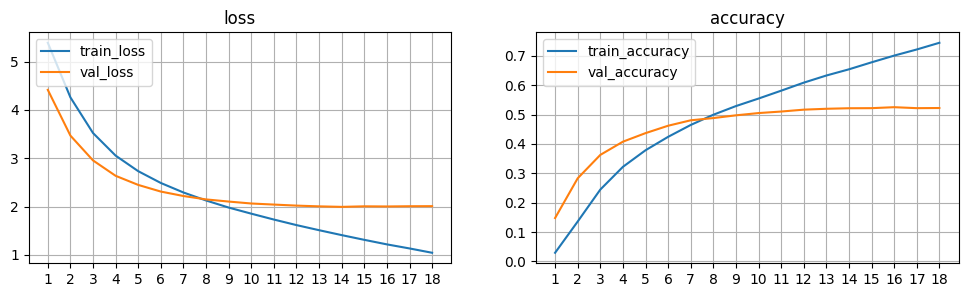

In [44]:
hist = model1.train(train_dl, valid_dl, epochs=1000, patience=4, metrics=[utils.metric_accuracy])
utils.plot_metrics(hist)

In [34]:
# model1.load_checkpoint()
model1.evaluate(test_dl, metrics=[utils.metric_accuracy])

{'loss': 1.992439828491211, 'accuracy': 0.522}

In [35]:
def mc_accuracy(model, dataloader, n_samples=10):
    model.eval()
    def enable_dropout(m):
        if type(m) == torch.nn.Dropout:
            m.train()

    model.apply(enable_dropout)
    with torch.no_grad():
        correct = 0
        total = 0
        for x, y_true in dataloader:
            x, y_true = x.to(utils.device), y_true.to(utils.device)
            predictions = []
            for _ in range(n_samples):
                y_pred_mc = model(x).argmax(dim=1)
                predictions.append(y_pred_mc)
            predictions = torch.stack(predictions, dim=1)
            y_pred = predictions.mode(dim=1).values
            correct += (y_pred == y_true).sum().item()
            total += y_pred.size(0)
        model.eval()
        return correct / total

    
mc_accuracy(model1.model, test_dl, 100)


0.5222

In [80]:
x, y_true = next(iter(test_dl))
x, y_true = x.to(utils.device), y_true.to(utils.device)
y_true = y_true
y_pred = None
for samples in range(10):
    y_pred_mc = model1.model(x)
    y_pred_mc = y_pred_mc.argmax(dim=1).unsqueeze(dim=1)
    if y_pred is None:
        y_pred = y_pred_mc
    else:
        y_pred = torch.concat([y_pred, y_pred_mc], dim=1)
y_pred = y_pred.mode(dim=1).values



tensor([[ 49,  21,  48,  44,  49,  21,  49,  21,  32,  21],
        [ 35,  35, 194, 194,  35,  35,  35,  35, 194,  35],
        [114,  16,  20,  16,  20,  20,  16,  20, 170,  20],
        [ 70,  70, 195, 157, 195,  69,  57,  70,  70,  73],
        [ 59, 106,  59,  61,  59, 107, 107, 126, 126, 126],
        [ 31,  31,  31,  31,  31, 159, 154,  26,  31,  31],
        [196, 196,  12, 137,  73, 137,  36,  32, 196,  36],
        [169, 196, 122, 169, 169,  91, 169, 114, 122, 171],
        [ 88, 150,  57, 178, 184, 184, 184,  75, 184, 184],
        [ 61,  85,  61,  73, 124,  81,  61, 124,  63,  61],
        [ 66,  66,  66,  94,  66,  72,  94,  94,  17,  66],
        [164,  16,  36,  16,  36,  16,   0,  16,   0,  16],
        [187,  24,  24, 129,  44,  23,  24,  24,  23,  24],
        [147,  68,  68,  68,  68, 112,  68,  68, 112,  52],
        [ 35,  40, 175, 194, 184, 194,  37, 194, 196,  58],
        [105, 165, 105, 165, 105, 105, 141, 130, 105,  39],
        [168, 168, 174, 168, 168,  27, 1

In [83]:
y_pred = y_pred.mode(dim=1).values

In [87]:
# torch.concat([y_pred.unsqueeze(1), y_true.unsqueeze(1)],dim=1)
y_true

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0')

In [78]:
a = torch.randint(3, (6, 10))
print(a)
print(a.mode(dim=1))
torch.sum(a==a - 1)

tensor([[0, 0, 2, 1, 0, 1, 0, 1, 1, 0],
        [1, 0, 0, 1, 2, 1, 2, 0, 1, 0],
        [0, 1, 2, 0, 1, 1, 2, 1, 0, 1],
        [2, 1, 1, 1, 0, 1, 2, 1, 0, 0],
        [2, 0, 1, 0, 2, 2, 0, 0, 1, 2],
        [2, 1, 2, 2, 1, 0, 0, 1, 0, 0]])
torch.return_types.mode(
values=tensor([0, 0, 1, 1, 0, 0]),
indices=tensor([9, 9, 9, 7, 7, 9]))


tensor(0)

Best loss: 1.9436


100%|██████████| 157/157 [00:01<00:00, 90.32it/s] 


Epoch 1/1000: train_loss=0.9958, train_accuracy=0.7613, val_loss=1.8266, val_accuracy=0.5504
Saved checkpoint for resnet-18-transfer-01. epoch=3, step=4221. train_loss=0.9958, train_accuracy=0.7613, val_loss=1.8266, val_accuracy=0.5504


100%|██████████| 157/157 [00:01<00:00, 90.79it/s] 


Epoch 2/1000: train_loss=0.8289, train_accuracy=0.8053, val_loss=1.8345, val_accuracy=0.5484


100%|██████████| 157/157 [00:01<00:00, 85.75it/s]


Epoch 3/1000: train_loss=0.7195, train_accuracy=0.8356, val_loss=1.8377, val_accuracy=0.5520


100%|██████████| 157/157 [00:01<00:00, 85.45it/s]


Epoch 4/1000: train_loss=0.6249, train_accuracy=0.8630, val_loss=1.8620, val_accuracy=0.5475


100%|██████████| 157/157 [00:01<00:00, 88.30it/s]


Epoch 5/1000: train_loss=0.5402, train_accuracy=0.8870, val_loss=1.8862, val_accuracy=0.5464
Loaded model resnet-18-transfer-01 from checkpoint. epoch=3, step=4221. train_loss=0.9958, train_accuracy=0.7613, val_loss=1.8266, val_accuracy=0.5504


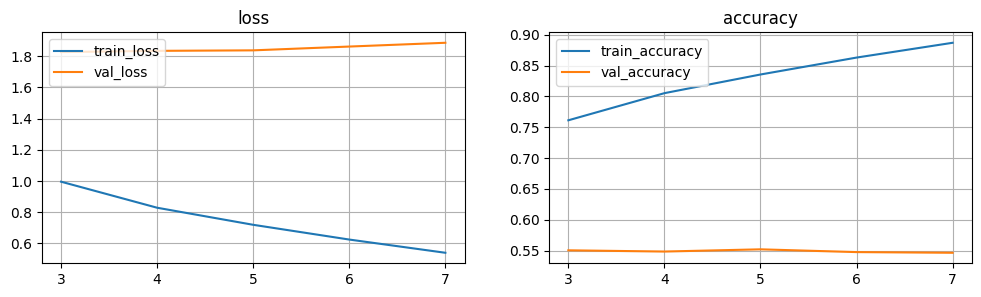

In [20]:
model1.compile(optimizer_cls=torch.optim.Adam, optimizier_args=dict(lr=1e-5, weight_decay=5e-4), loss_fn_cls=torch.nn.CrossEntropyLoss)
hist = model1.train(train_dl, valid_dl, epochs=1000, patience=4, metrics=[utils.metric_accuracy])
utils.plot_metrics(hist)

In [22]:
model1.evaluate(test_dl, metrics=[utils.metric_accuracy])

{'loss': 1.8424995349884032, 'accuracy': 0.5477}

---

tensor([0])
('n01443537', 'goldfish, Carassius auratus')


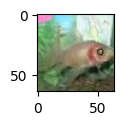

In [14]:
x, y = next(iter(valid_dl))
x, y = x[:1], y[:1]

fig, ax = plt.subplots(figsize=(1, 1))
ax.imshow(np.transpose(x.squeeze(), [1, 2, 0]))
print(y)
print(classes[y])

In [15]:
model1.model(x.to(utils.device)).topk(5)

torch.return_types.topk(
values=tensor([[3.4151, 3.2630, 2.5056, 1.8423, 1.5935]], device='cuda:0',
       grad_fn=<TopkBackward0>),
indices=tensor([[43,  0, 42, 28, 14]], device='cuda:0'))

In [16]:
train_dl, valid_dl, test_dl, classes = utils.make_cifar_dataloaders()

In [17]:
# model1 = utils.register_model(
#     'resnet-18-transfer-02-cifar', 
#     ResNet18Transfer(), 
#     'Transfer learning from ResNet18 by overriding the last fc layer, batch size 64. This time on CIFAR-100.')
# model1.setup(optimizer_cls=torch.optim.Adam, optimizer_args=dict(weight_decay=5e-4), loss_fn_cls=torch.nn.CrossEntropyLoss)
# print()